# Perguntas para serem sanadas com os experimentos
1. Qual heurística encontrou mais soluções?
2. Qual a melhor heurística em termos de quantidade de atribuição de valores
3. Para o problema do Futoshiki e levando em consideração os casos de teste executados, vale a pena utilizar alguma heurística para corte? Levando em consideração o tempo de processamento e a quantidade de atribuições.
4. Existe algum padrão entre quantidade de restrições e solução do problema?

#### Heurísticas

0 - Backtracking sem poda

1 - Backtracking com verificação adiante

2 - Backtracking com MVR + Verificação adiante

3 - Backtracking com MVR + Verificação adiante + Grau (para desempate)

4 - Backtracking com MVR (Valores válidos) + Verificação adiante + Grau (para desempate)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

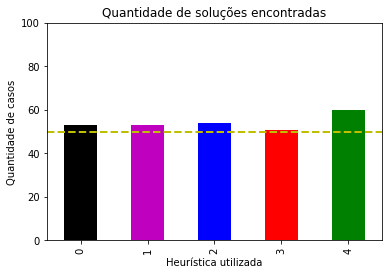

In [146]:
# Read the csv file
df = pd.read_csv("report.csv")

df1 = df[df.solutionFound==True].groupby(['heuristicType'])[['solutionFound']].count()
df1.rename(columns={'0': 'BT', '1': 'BT+FC', '2': 'BT+MRV1+FC', '3': 'BT+MRV2+FC', '4': 'BT+MRV3+FC'}, inplace=True)

#print(df1)

df1.plot(kind='bar', title='Quantidade de soluções encontradas', ylim=(0,100), color='kmbrg', legend=False)

plt.axhline(y=50, color='y', label='Average', linestyle='--', linewidth=2)
plt.xlabel("Heurística utilizada")
plt.ylabel("Quantidade de casos")
plt.show()